In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../src/qspright/")
sys.path.append("src")
sys.path.append("src/rna_transform")

import rna_transform.utils as utils
import rna_transform.rna_utils as rna_utils

from qspright.utils import dec_to_qary_vec

In [2]:
q = 4
positions = rna_utils.RNA_POSITIONS

# positions += [3,4]
# rna_utils.RNA_POSITIONS = positions

n = len(positions)

print("n = {}, N = {}".format(n, n ** q))

n = 8, N = 4096


### get Lasso coefficients

In [3]:
# emp_beta_lasso = rna_utils.calculate_rna_lasso(save=True)

In [4]:
# Calculate fraction of variance explained by empirical coefficients
# bm_fv_lasso = utils.calc_frac_var_explained(emp_beta_lasso)

### get GWHT coefficients

In [5]:
emp_beta_gwht = rna_utils.calculate_rna_gwht(save=True)
print(emp_beta_gwht)

Loaded saved beta array for GWHT.
[ 0.00000000e+00-0.00000000e+00j  6.50761717e+01-1.80050789e+01j
 -5.37179726e+01-0.00000000e+00j ...  5.66403419e-02-2.30468586e-02j
  4.92188409e-02+4.37500924e-02j -8.98450613e-03-1.13277808e-02j]


In [6]:
# Calculate fraction of variance explained by empirical coefficients
bm_fv_gwht = utils.calc_frac_var_explained(emp_beta_gwht)

### get GWHT coefficients with QSPRIGHT

In [7]:
gwht, n_used, peeled = rna_utils.calculate_rna_qspright(save=False, report = True, noise_sd = 300)
emp_beta_qspright = np.reshape(gwht, -1)
print("sample ratio = ", n_used / q ** n)
print("found sparsity = ", np.sum(np.abs(emp_beta_qspright) > 1e-5))
print("Ratio of Explained Power = ", 1 - np.linalg.norm(emp_beta_gwht - emp_beta_qspright)**2/np.linalg.norm(emp_beta_gwht)**2)

Loaded saved RNA data.
Finding GWHT coefficients with QSPRIGHT
b =  4
cutoff =  18432.0000000001
Found GWHT coefficients
sample ratio =  0.4161224365234375
found sparsity =  117
Ratio of Explained Power =  0.8464116590581541


In [8]:
# Calculate fraction of variance explained by empirical coefficients
bm_fv_qspright = utils.calc_frac_var_explained(emp_beta_qspright)

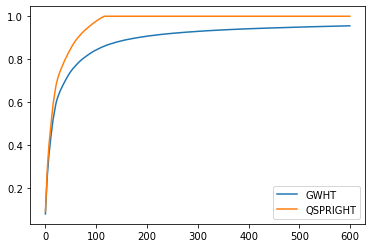

In [9]:
# plt.plot(bm_fv_lasso[:300], label = "Fourier")
plt.plot(bm_fv_gwht[:600], label = "GWHT")
plt.plot(bm_fv_qspright[:600], label = "QSPRIGHT")
plt.legend()
plt.show()

### compare indices with most energy

In [10]:
beta_power = np.abs(emp_beta_gwht) ** 2
for _ in range(30):
    ind = beta_power.argmax()
    print(beta_power[ind], np.array(dec_to_qary_vec([ind], n = n, q=q))[:, 0])
    beta_power[ind] = 0

20052.771485295565 [0 0 0 0 0 2 0 0]
13400.77811370529 [2 0 0 0 0 0 0 2]
11352.977657894078 [0 0 0 0 0 0 1 0]
11352.977657894078 [0 0 0 0 0 0 3 0]
10392.68684201875 [0 0 0 2 0 0 0 0]
7624.427416547038 [0 0 2 0 0 0 0 0]
7386.3432714296605 [0 0 1 0 0 0 0 0]
7386.3432714296605 [0 0 3 0 0 0 0 0]
5540.936343287297 [0 0 0 0 0 1 0 0]
5540.936343287297 [0 0 0 0 0 3 0 0]
5264.666776567108 [1 0 0 0 0 0 0 1]
5264.666776567108 [3 0 0 0 0 0 0 3]
4697.893286874121 [0 1 0 0 0 0 0 0]
4697.893286874121 [0 3 0 0 0 0 0 0]
4559.090990385492 [0 0 0 0 0 0 0 1]
4559.090990385492 [0 0 0 0 0 0 0 3]
3476.537197663604 [2 0 0 0 0 0 0 1]
3476.537197663604 [2 0 0 0 0 0 0 3]
3379.6055131538865 [2 0 0 0 0 0 0 0]
3183.403958498384 [0 1 1 0 0 0 0 0]
3183.403958498384 [0 3 3 0 0 0 0 0]
2885.6205769418443 [0 0 0 0 0 0 0 2]
2160.3612646306547 [0 0 0 0 2 0 0 0]
2021.527577272492 [0 0 1 0 0 1 0 0]
2021.527577272492 [0 0 3 0 0 3 0 0]
1568.3010116008911 [1 0 0 0 0 0 0 2]
1568.3010116008911 [3 0 0 0 0 0 0 2]
1545.8412536500161

In [11]:
beta_power = np.abs(emp_beta_qspright) ** 2
for _ in range(30):
    ind = beta_power.argmax()
    print(beta_power[ind], np.array(dec_to_qary_vec([ind], n = n, q=q))[:, 0])
    beta_power[ind] = 0

20007.158218526343 [0 0 0 0 0 2 0 0]
12306.204839409726 [2 0 0 0 0 0 0 2]
11461.856440819602 [0 0 0 0 0 0 1 0]
11461.856440819602 [0 0 0 0 0 0 3 0]
9972.019154728534 [0 0 0 2 0 0 0 0]
7413.975071338685 [0 0 2 0 0 0 0 0]
7346.150305999229 [0 0 1 0 0 0 0 0]
7346.150305999229 [0 0 3 0 0 0 0 0]
5394.224652202354 [0 0 0 0 0 1 0 0]
5394.224652202354 [0 0 0 0 0 3 0 0]
5107.621247742162 [0 0 0 0 0 0 0 1]
5107.621247742162 [0 0 0 0 0 0 0 3]
5000.811956163053 [0 3 0 0 0 0 0 0]
5000.811956163051 [0 1 0 0 0 0 0 0]
4786.702422109961 [1 0 0 0 0 0 0 1]
4786.702422109959 [3 0 0 0 0 0 0 3]
3534.3519719659816 [2 0 0 0 0 0 0 0]
3465.9512711366347 [2 0 0 0 0 0 0 1]
3465.9512711366337 [2 0 0 0 0 0 0 3]
3308.1920853198785 [0 1 1 0 0 0 0 0]
3308.192085319878 [0 3 3 0 0 0 0 0]
2893.8826940958497 [0 0 0 0 0 0 0 2]
2349.3144907423566 [0 0 0 0 2 0 0 0]
2014.396037612738 [0 0 3 0 0 3 0 0]
2014.3960376127366 [0 0 1 0 0 1 0 0]
1592.4035893675798 [3 0 0 0 0 0 0 2]
1592.4035893675793 [1 0 0 0 0 0 0 2]
1441.0438575882